In [1]:
import numpy as np
from numpy.linalg import inv
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib
import os
os.makedirs("equi-violation", exist_ok=True)

In [2]:
plt.rcParams["font.family"] = "serif"
plt.rcParams["font.serif"] = "Charter"
plt.rcParams["text.usetex"] = True
plt.rcParams['text.latex.preamble'] = r'\usepackage[bitstream-charter]{mathdesign} \usepackage{amsmath}'
FONTSIZE=15

In [3]:
FONTSIZE = 14  # pt
PAGEWIDTH = 11  # inches
MATPLOTLIB_PARAMS = {
    # Font sizes
    "font.size": FONTSIZE,  # controls default text sizes
    "axes.titlesize": FONTSIZE,  # fontsize of the axes title
    "axes.labelsize": FONTSIZE,  # fontsize of the x and y labels
    "xtick.labelsize": FONTSIZE,  # fontsize of the tick labels
    "ytick.labelsize": FONTSIZE,  # fontsize of the tick labels
    "legend.fontsize": FONTSIZE,  # legend fontsize
    "figure.titlesize": FONTSIZE,  # fontsize of the figure title
    # Figure size and DPI
    "figure.dpi": 100,
    "savefig.dpi": 300,
    "figure.figsize": (PAGEWIDTH / 2, PAGEWIDTH / 2),
    # colors
    "lines.markeredgewidth": 0.8,
    "axes.edgecolor": "black",
    "axes.grid": False,
    "grid.color": "0.9",
    "axes.grid.which": "both",
    # x-axis ticks and grid
    "xtick.bottom": True,
    "xtick.direction": "out",
    "xtick.color": "black",
    "xtick.major.bottom": True,
    "xtick.major.size": 4,
    "xtick.minor.bottom": True,
    "xtick.minor.size": 2,
    # y-axis ticks and grid
    "ytick.left": True,
    "ytick.direction": "out",
    "ytick.color": "black",
    "ytick.major.left": True,
    "ytick.major.size": 4,
    "ytick.minor.left": True,
    "ytick.minor.size": 2,
}
matplotlib.rcParams.update(MATPLOTLIB_PARAMS)
LEFT, BOTTOM, RIGHT, TOP = 0.16, 0.16, 0.95, 0.95
X_LABEL_POS, Y_LABEL_POS = -0.1, -0.15

### Amplitudes

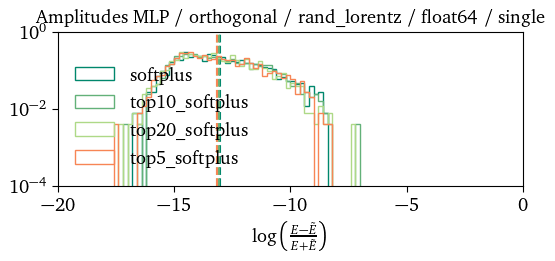

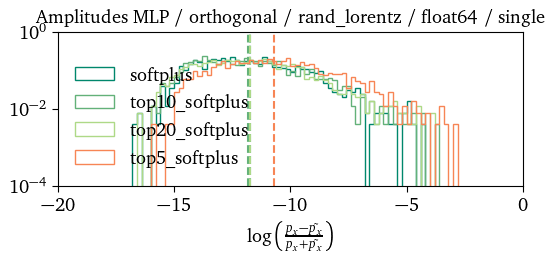

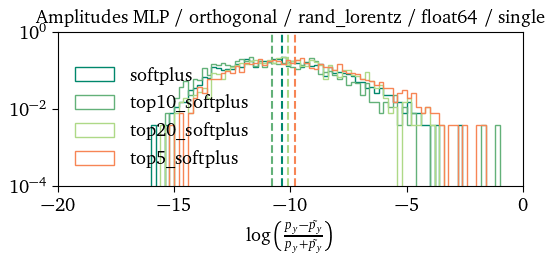

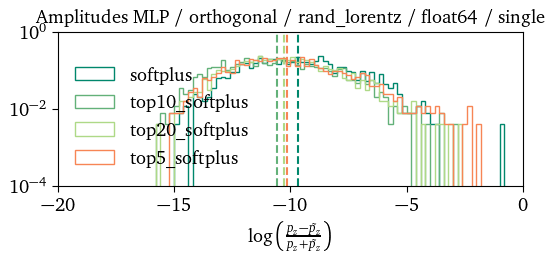

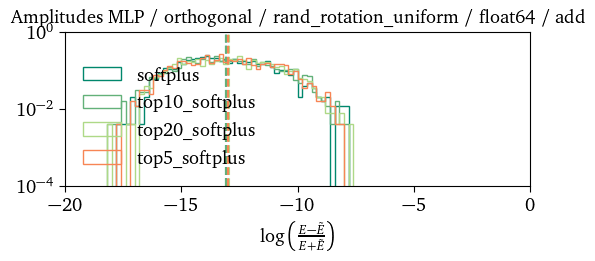

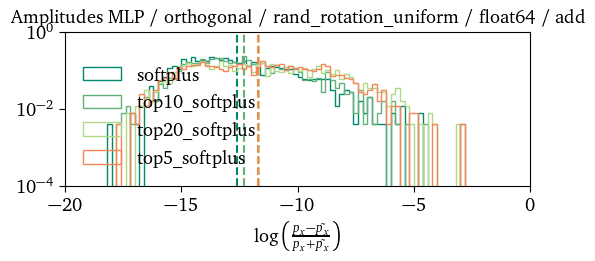

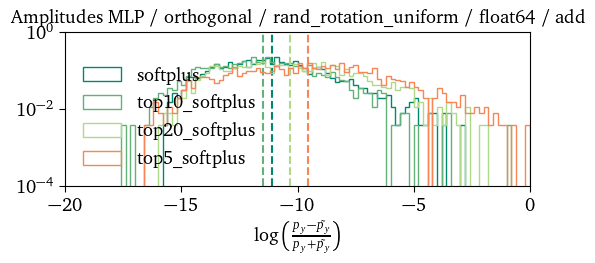

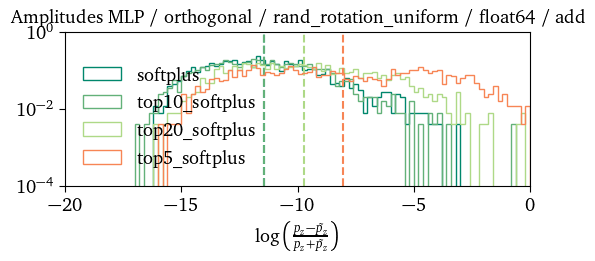

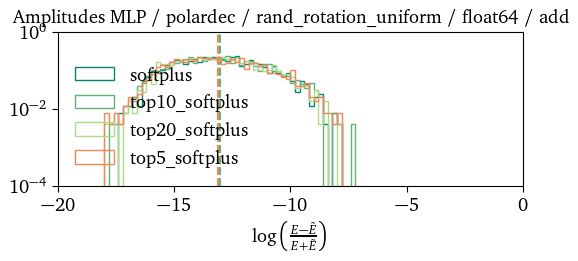

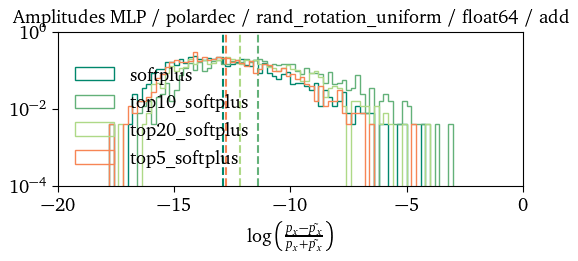

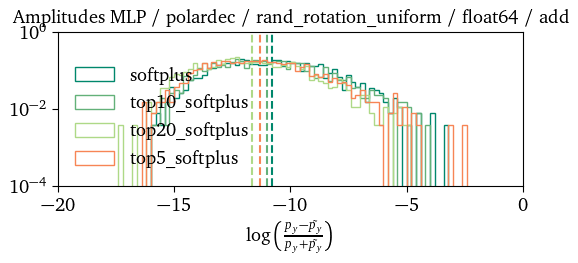

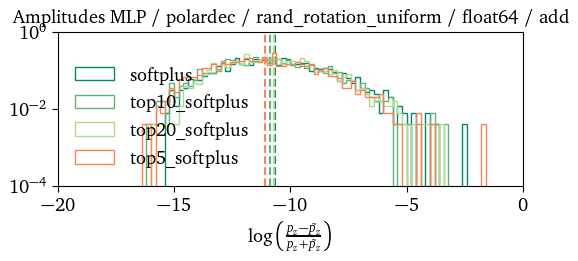

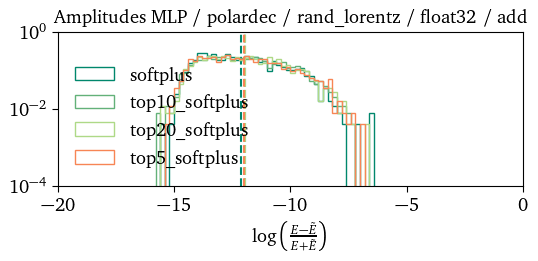

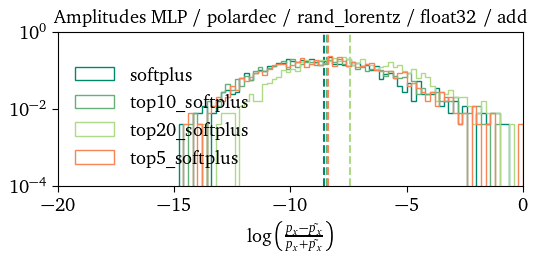

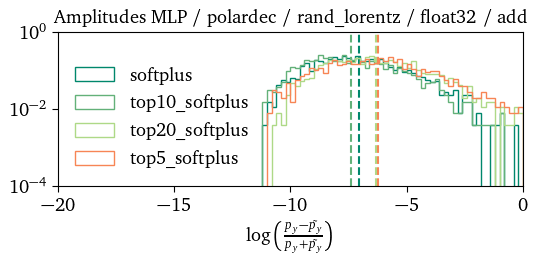

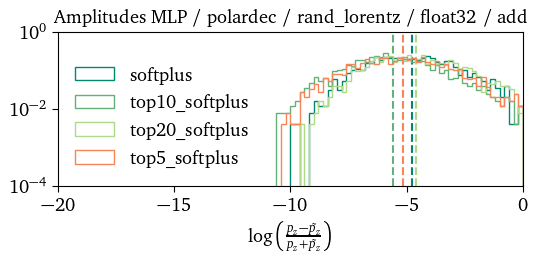

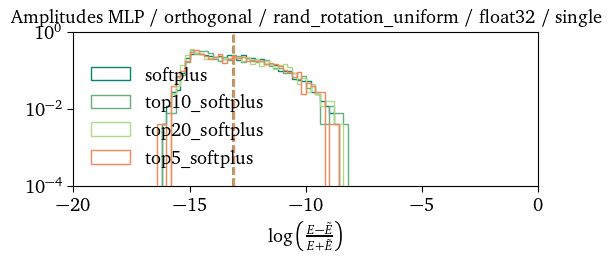

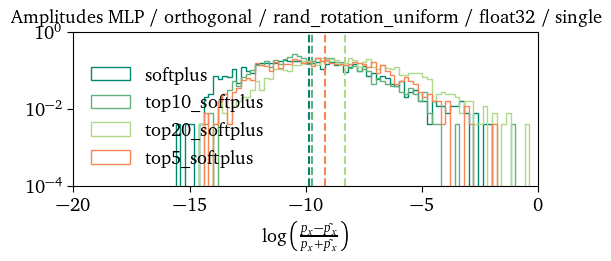

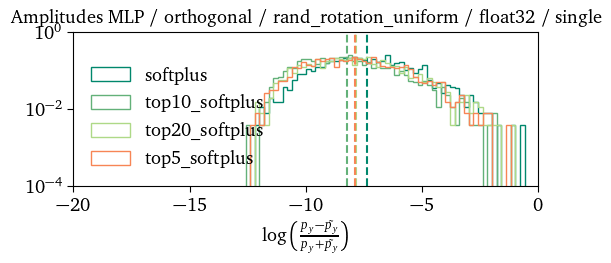

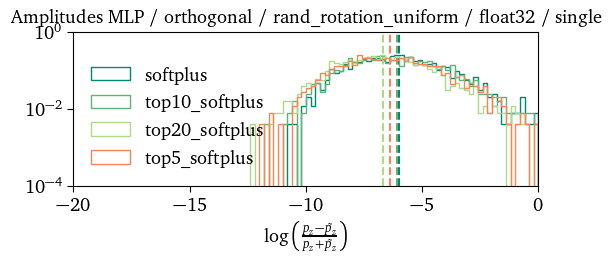

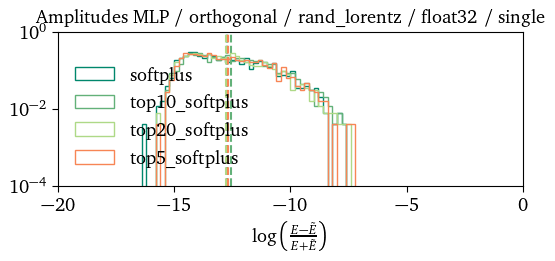

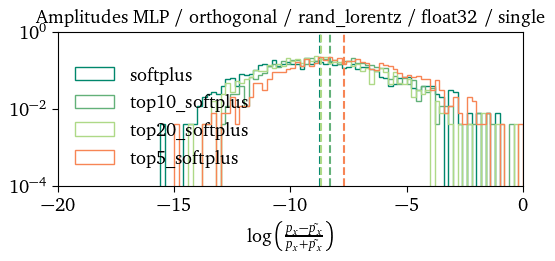

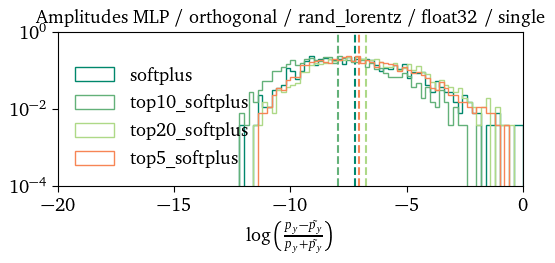

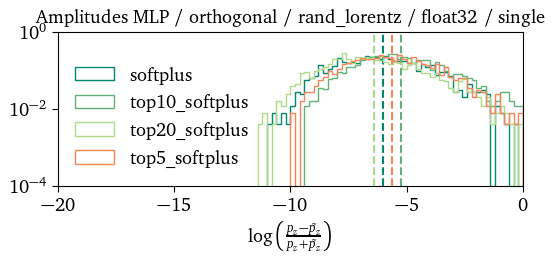

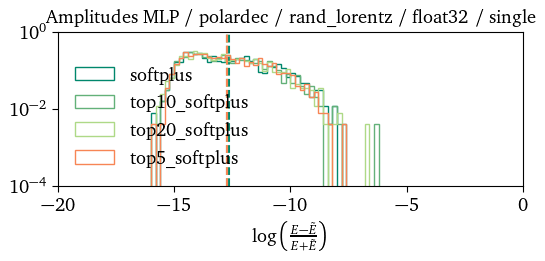

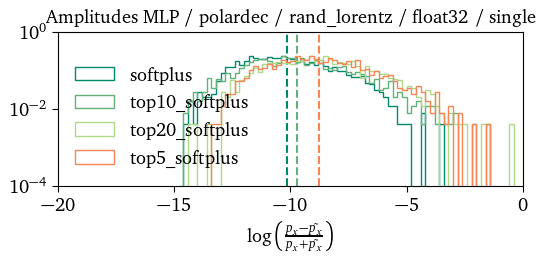

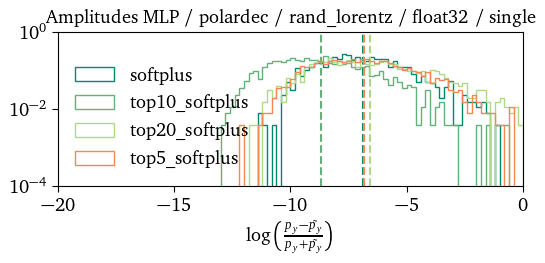

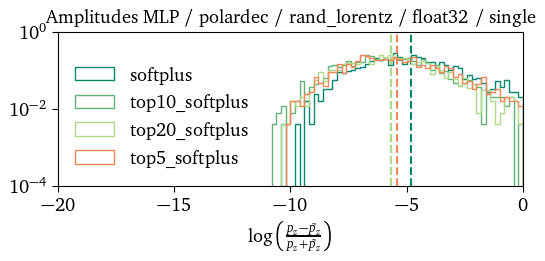

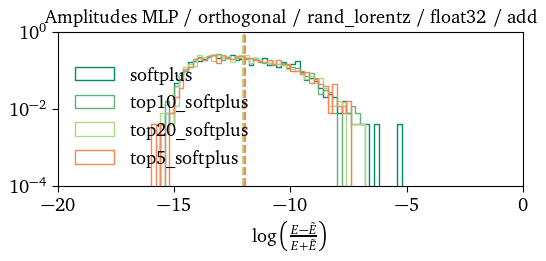

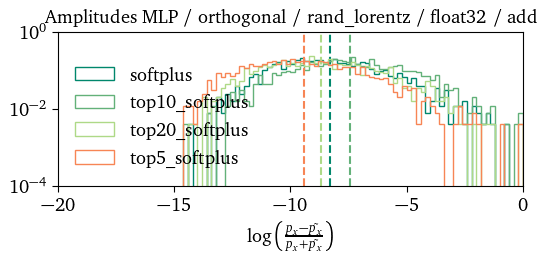

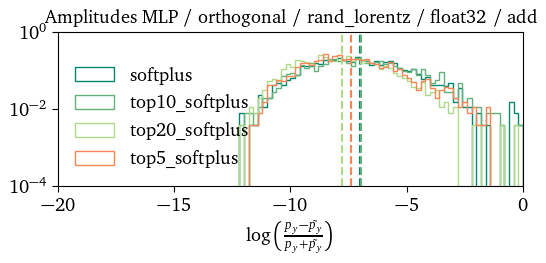

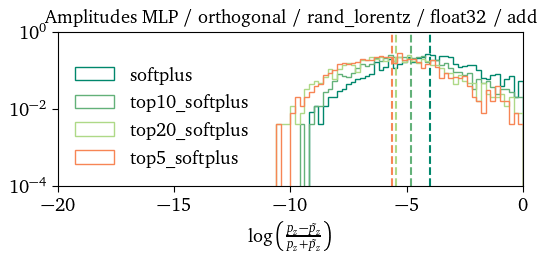

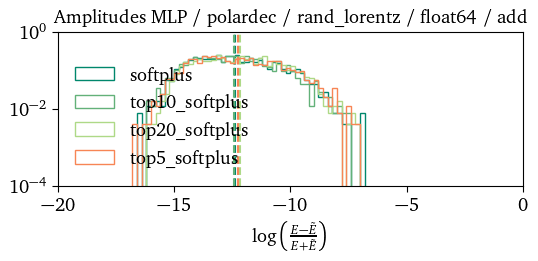

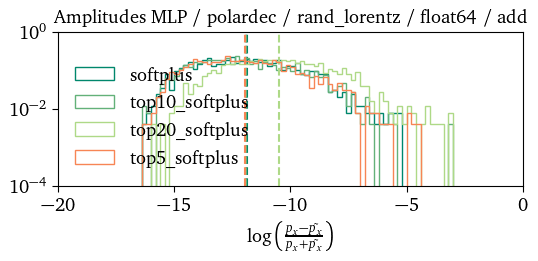

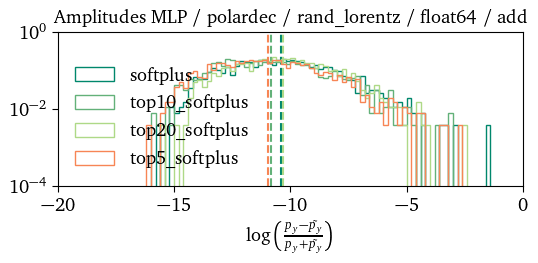

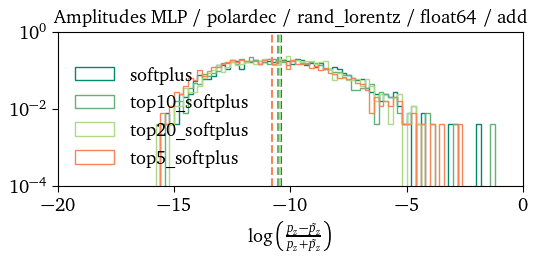

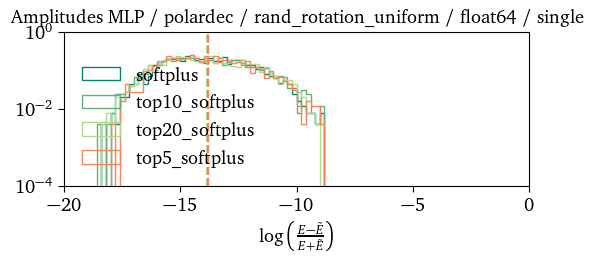

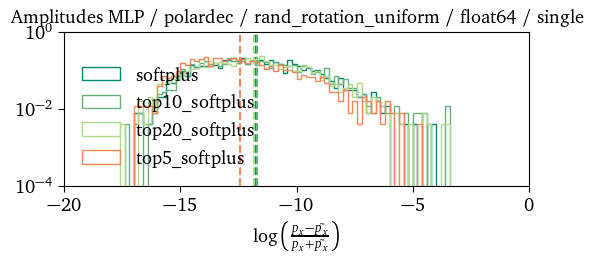

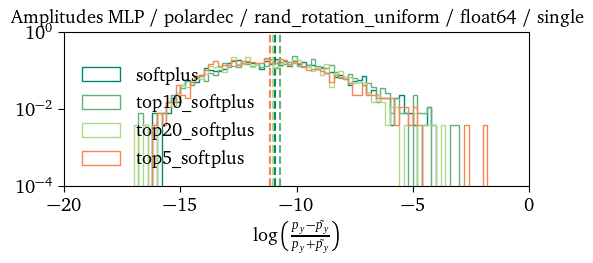

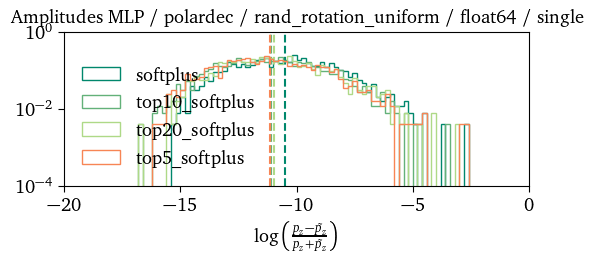

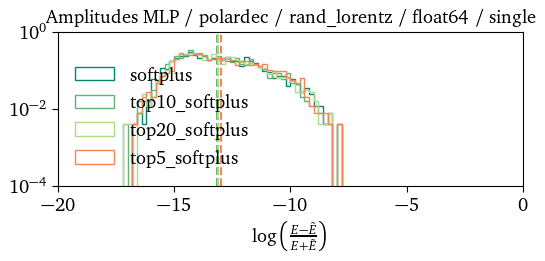

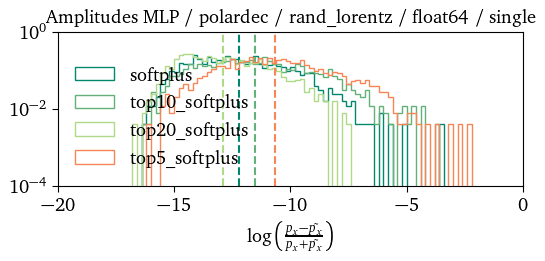

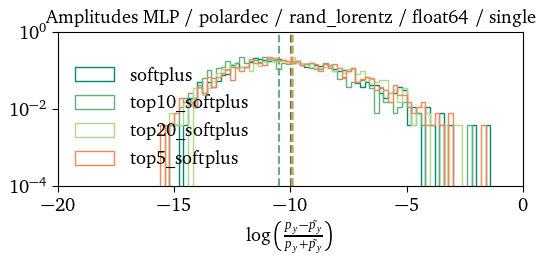

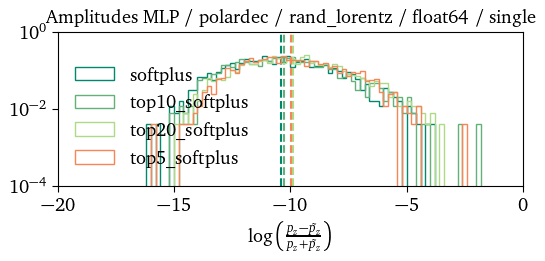

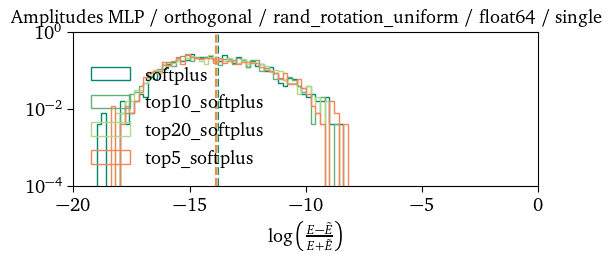

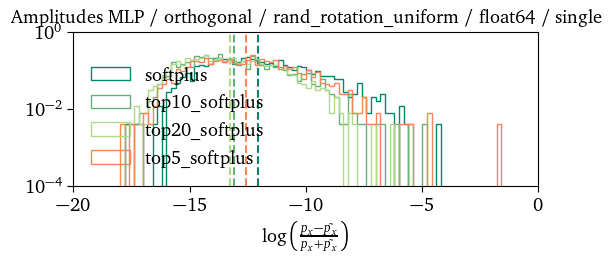

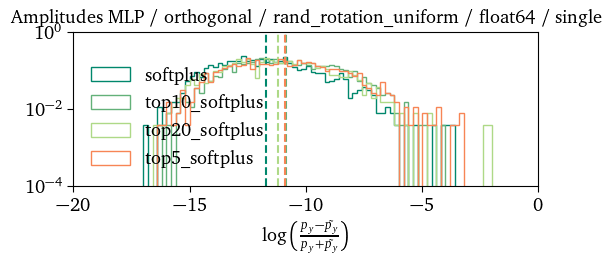

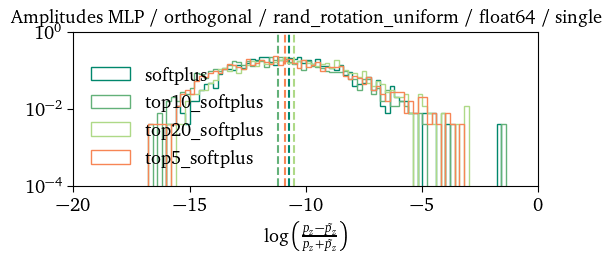

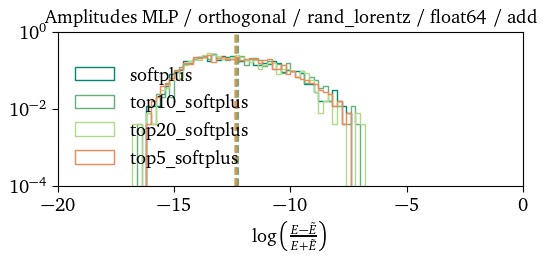

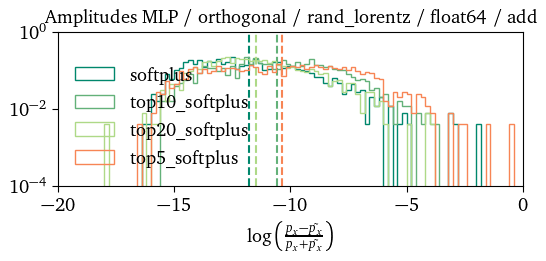

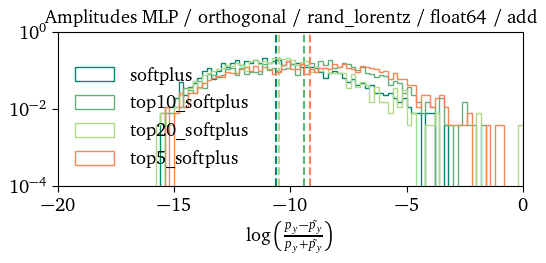

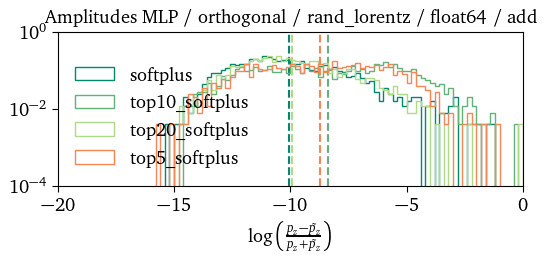

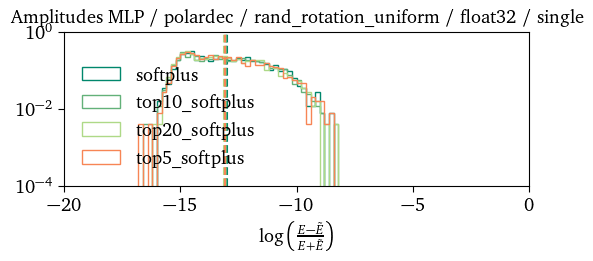

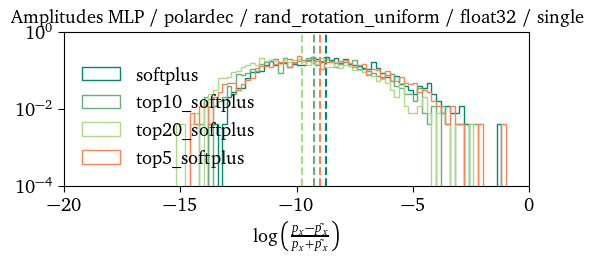

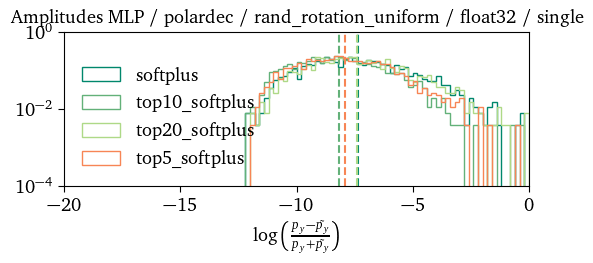

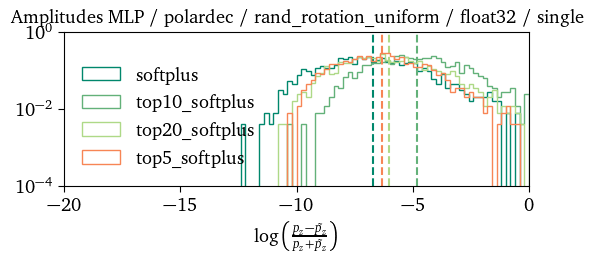

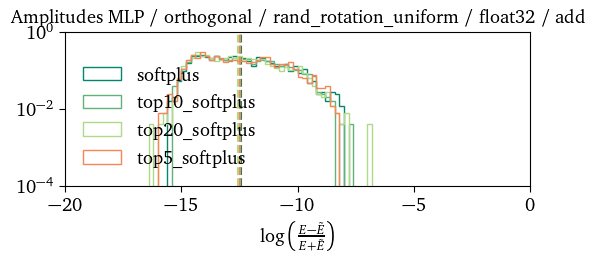

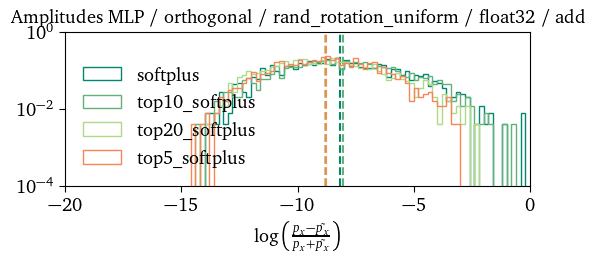

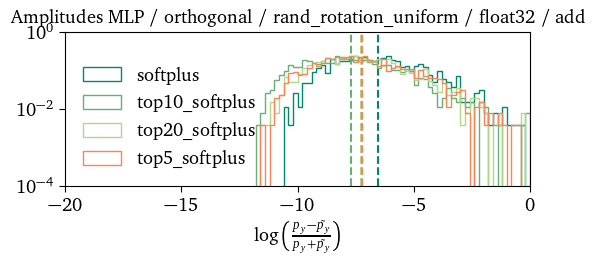

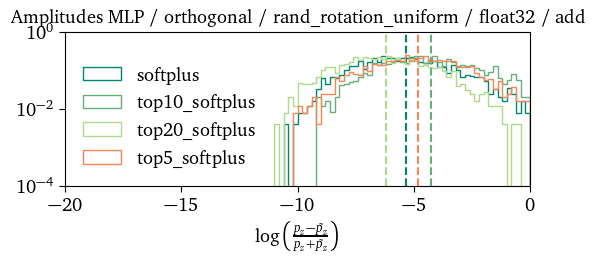

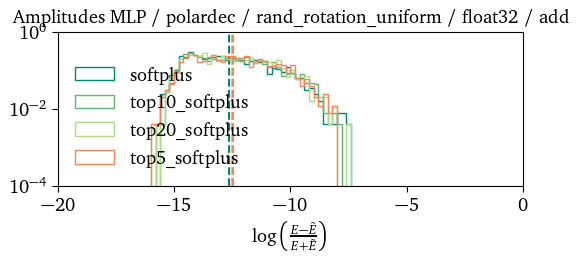

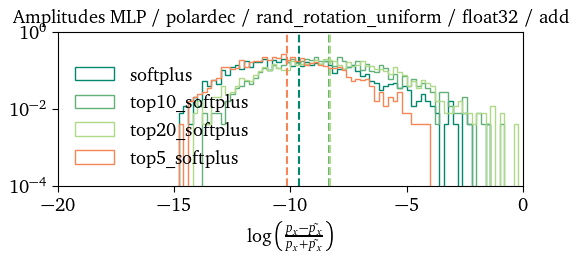

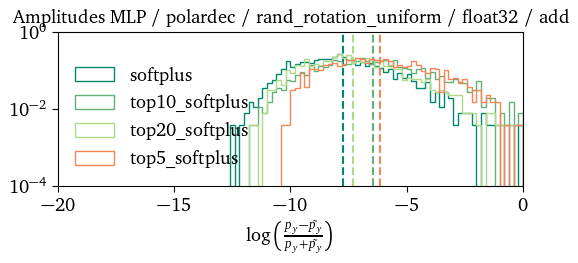

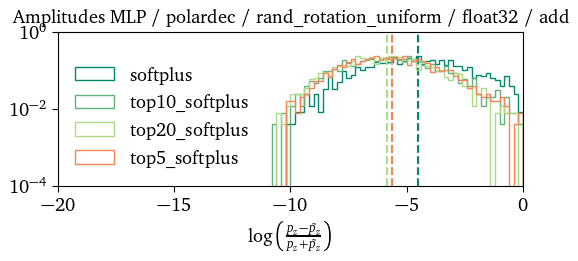

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
from collections import defaultdict

dir_path = "tests2/"

# Plot settings
xrange = [-20, 0]
yrange = [1e-4, 1e0]
colors = ["#00876c", "#63b179", "#aed987", "#f78555", "#de425b"]
linestyles = ["-", "--"]
component_names = ["E", "p_x", "p_y", "p_z"]

models = ["MLP", "Transformer", "GraphNet (nodes+edges)",
          "GraphNet (nodes only)", "GraphNet (edges only)"]

grouped_data = defaultdict(dict)
for fname in os.listdir(dir_path):
    if not fname.endswith(".npy"):
        continue

    path = os.path.join(dir_path, fname)
    data = np.load(path)

    base = os.path.splitext(fname)[0]
    parts = base.split(">")[1:]  # skip prefix like 'te_xt'
    experiment = base.split(">")[0]

    # Updated parsing logic
    different_plots = []
    different_lines = []
    for part in parts:
        tokens = part.split("~")
        different_plots.append(tokens[0])
        different_lines.extend(tokens[1:])

    key = tuple(different_plots)
    for nonlinearity in different_lines:
        grouped_data[key][nonlinearity] = data

with PdfPages(f"{dir_path}amp-equi-violation_invariants.pdf") as file:
    for plot_key, line_dict in grouped_data.items():
        model_idx = int(plot_key[0])

        for component in range(4):
            fig, ax = plt.subplots(figsize=(6, 2))
            ax.set_yscale("log")

            for i, (nonlinearity, data) in enumerate(sorted(line_dict.items())):
                values = data[:, component]
                log_data = np.log10(values)
                kwargs = {
                    "bins": 100,
                    "range": xrange,
                    "density": True,
                    "histtype": "step",
                    "color": colors[i % len(colors)],
                    "label": nonlinearity,
                }
                ax.hist(log_data, **kwargs)
                mean = log_data.mean()
                ax.vlines(mean, *yrange, color=colors[i % len(colors)], linestyle="--")

            ax.set_ylim(yrange)
            ax.set_xlim(xrange)
            ax.legend(loc=3, frameon=False)
            ax.set_xlabel(
                experiment + " " + rf"$\log\left(\frac{{{component_names[component]} - \tilde{{{component_names[component]}}}}}{{{component_names[component]} + \tilde{{{component_names[component]}}}}}\right)$"
            )
            ax.set_title(f"Amplitudes {models[model_idx]} / " + " / ".join(plot_key[1:]))
            plt.savefig(file, format="pdf", bbox_inches="tight")
            plt.show()


### Tagging

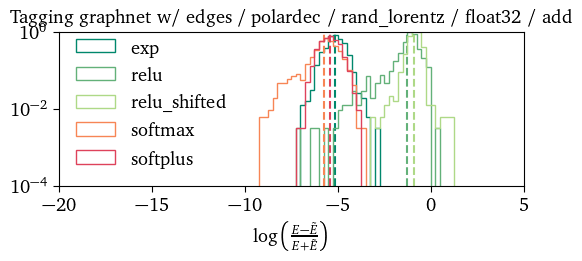

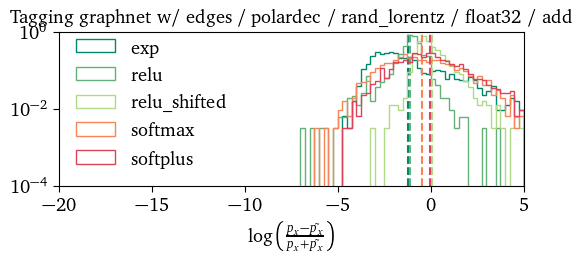

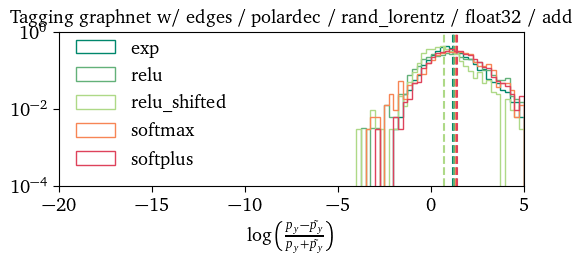

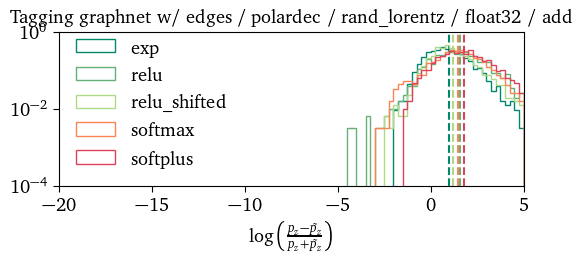

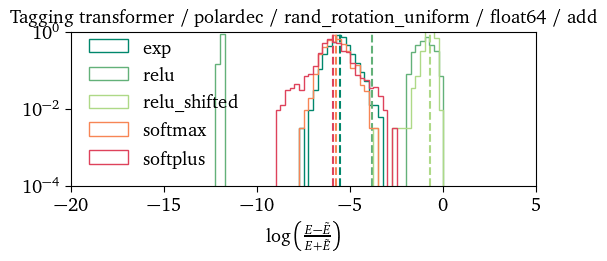

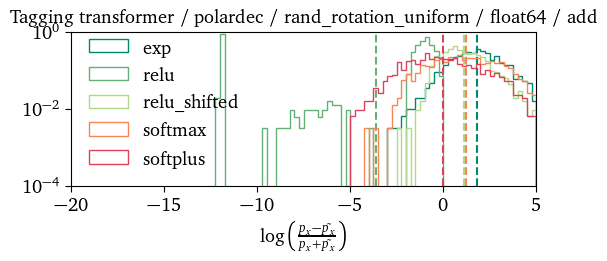

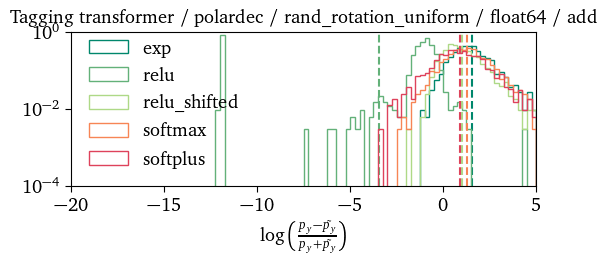

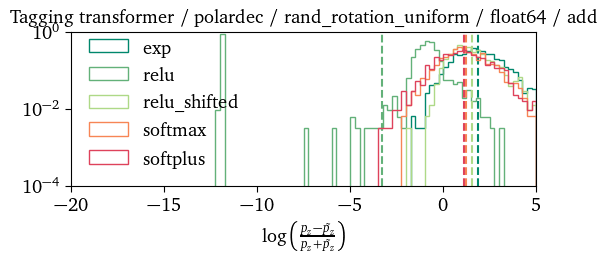

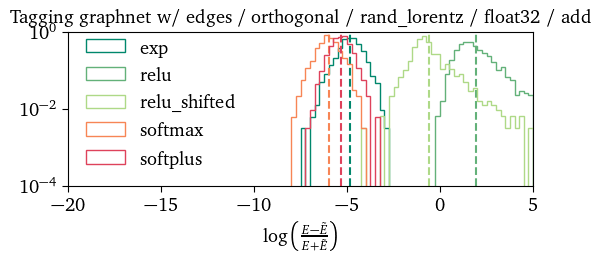

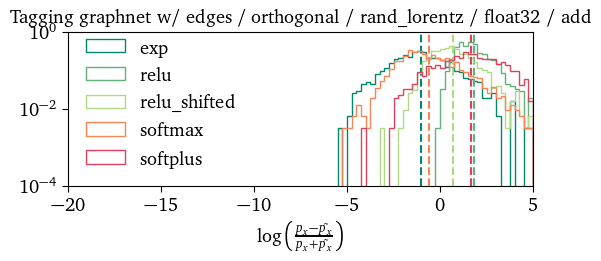

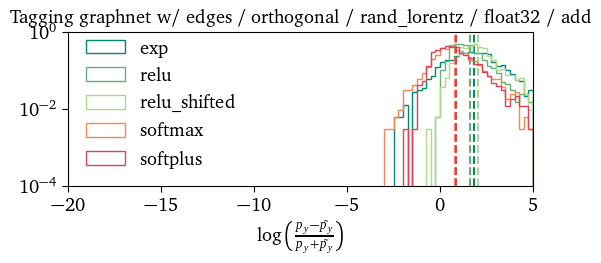

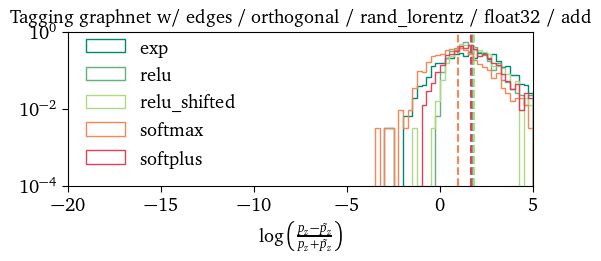

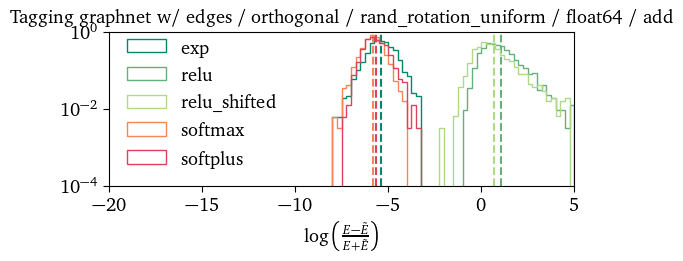

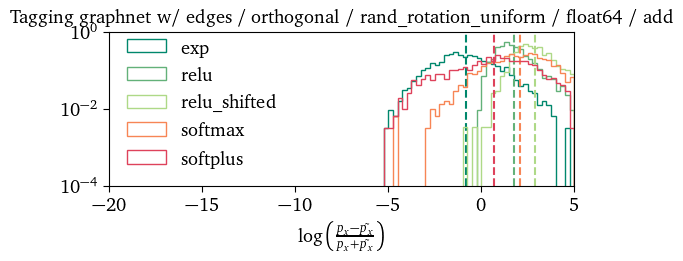

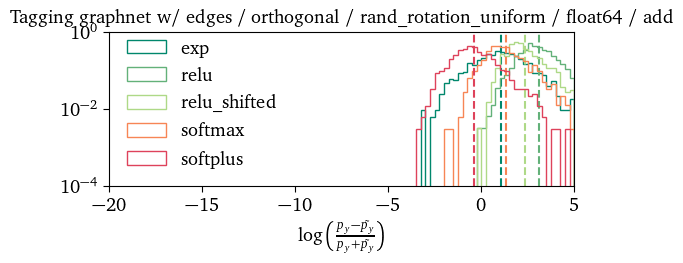

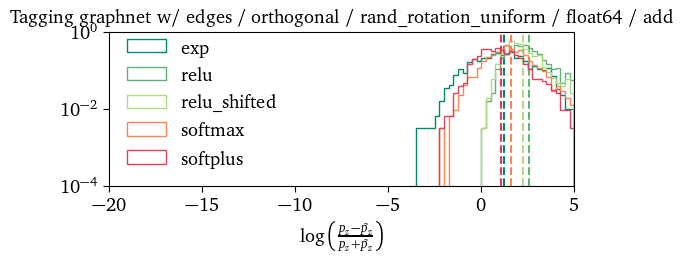

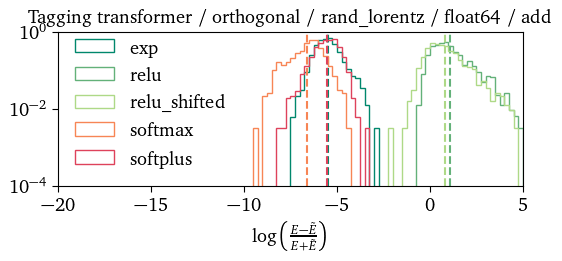

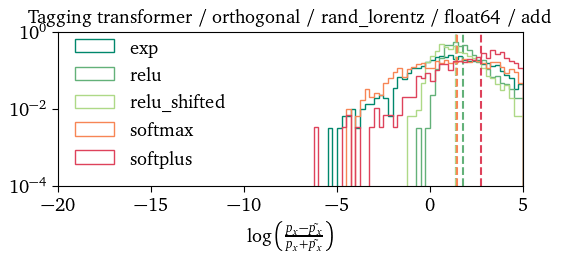

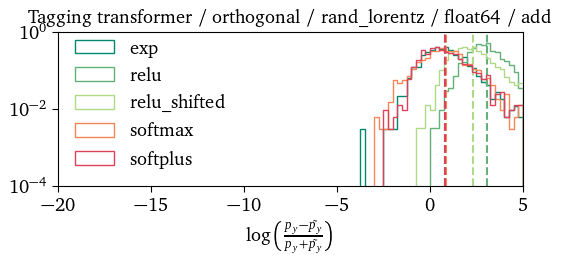

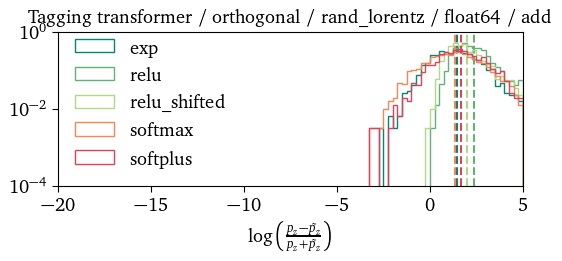

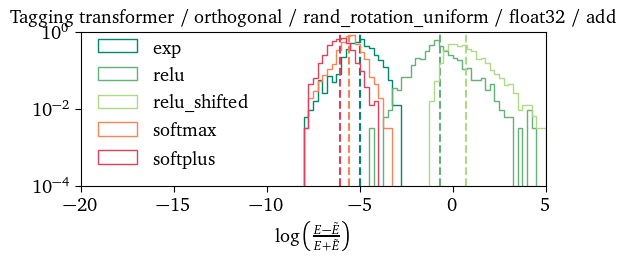

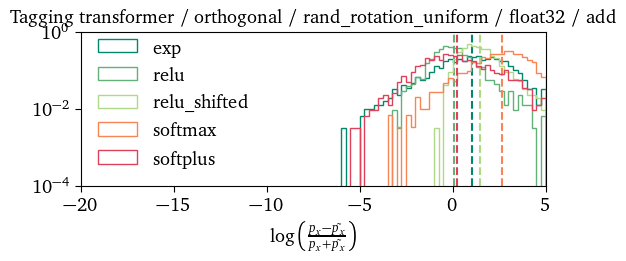

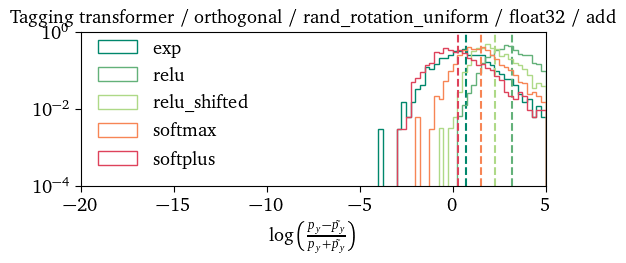

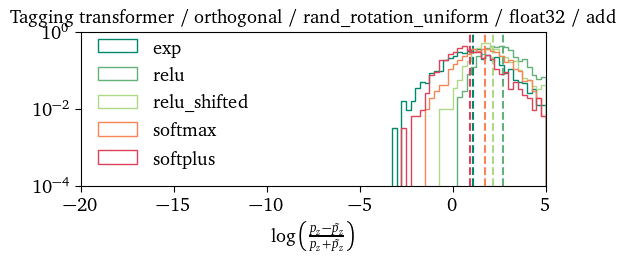

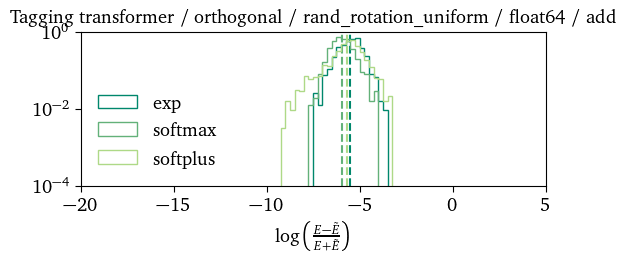

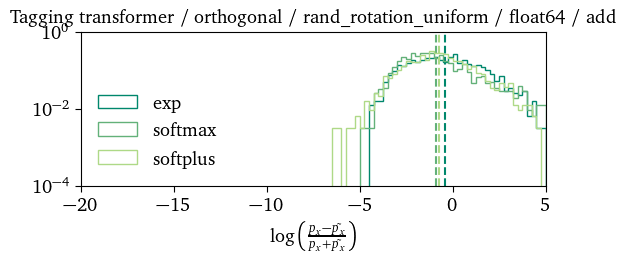

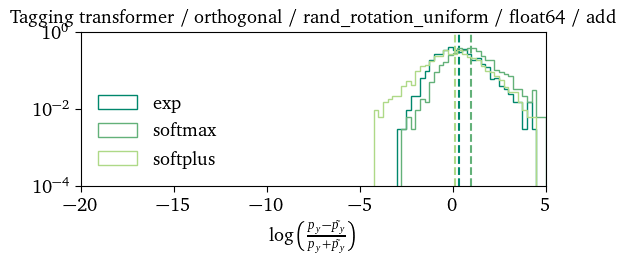

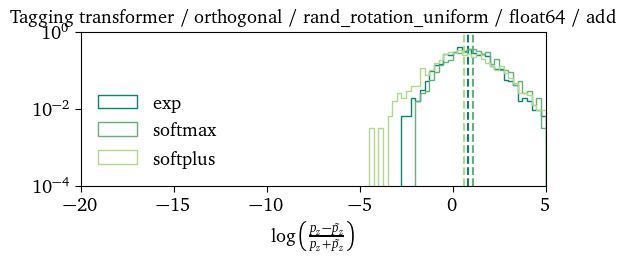

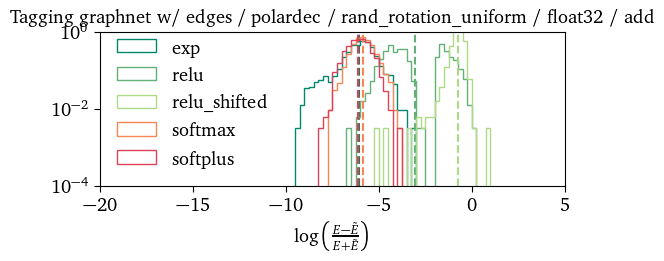

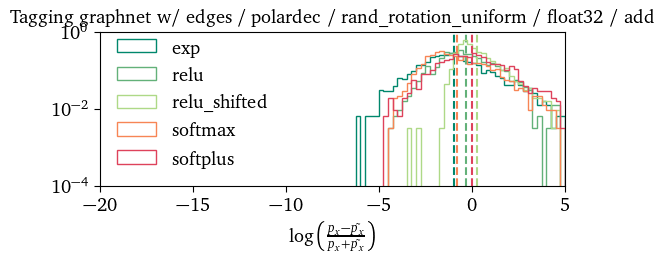

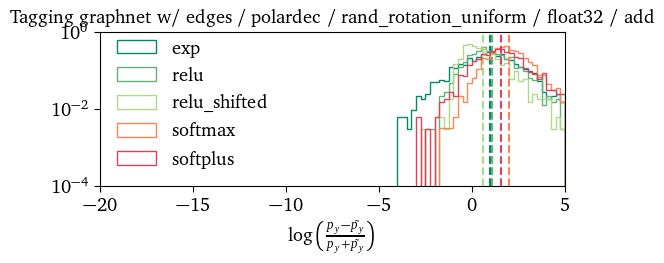

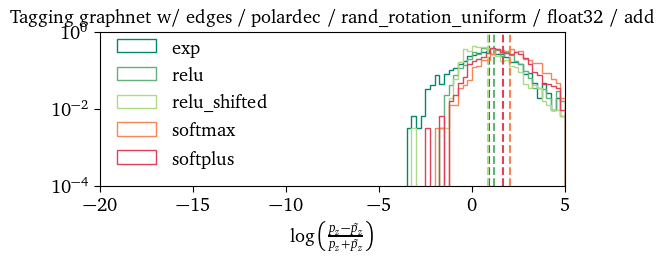

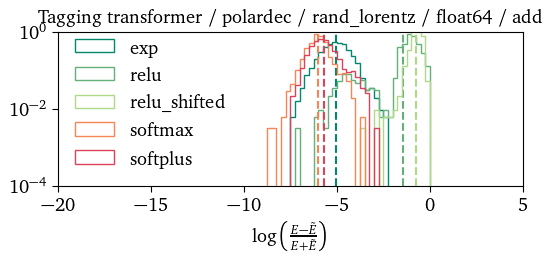

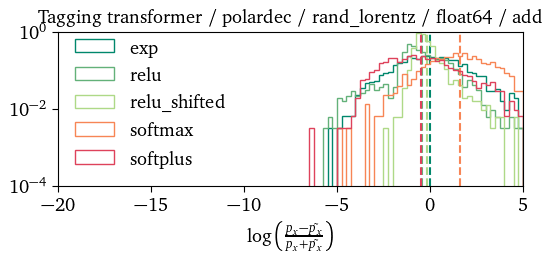

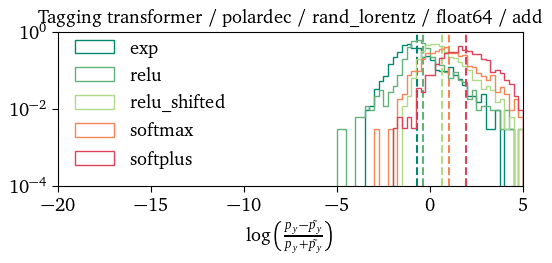

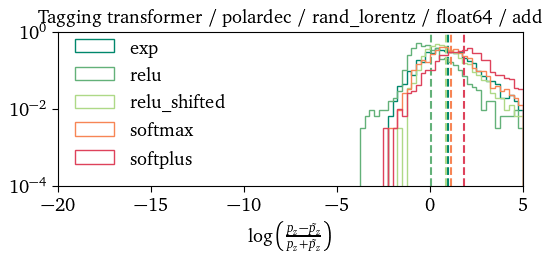

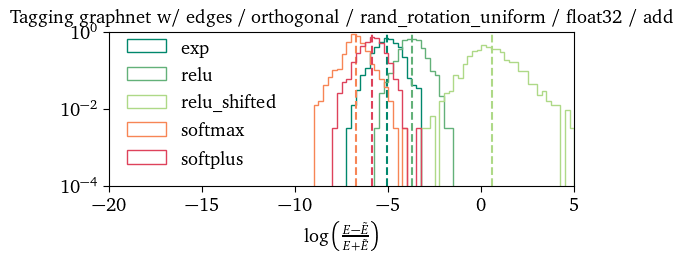

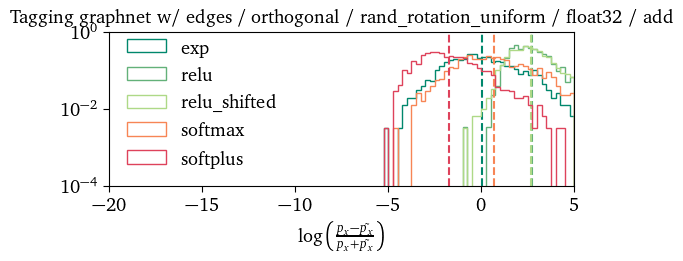

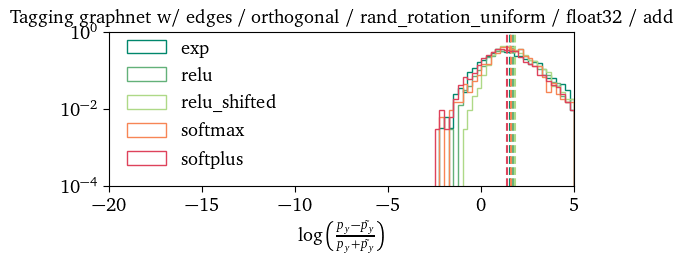

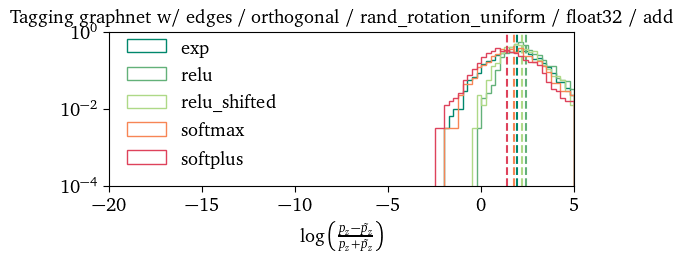

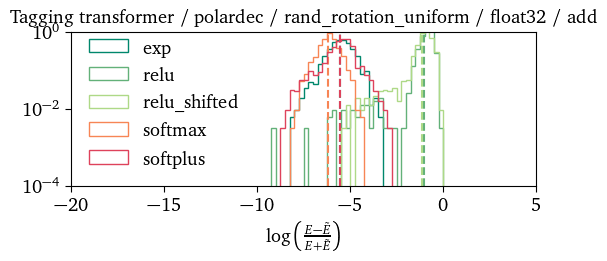

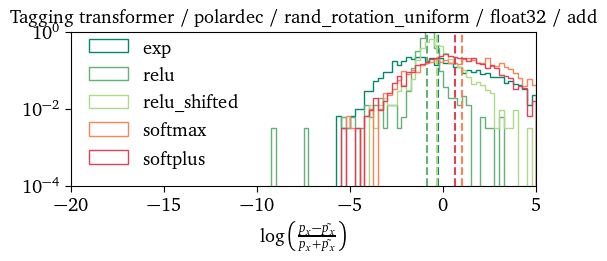

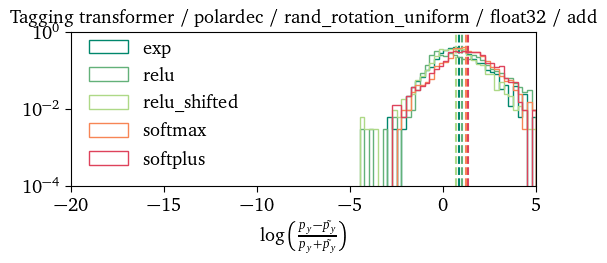

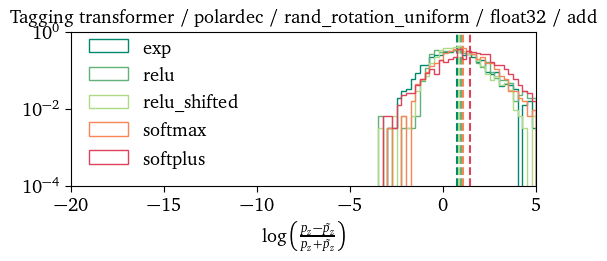

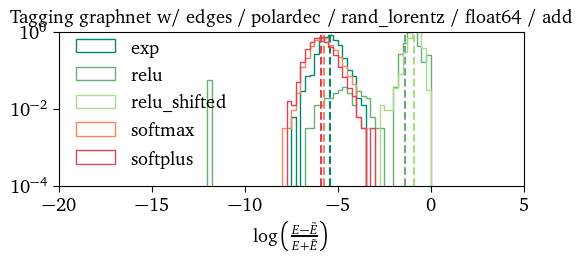

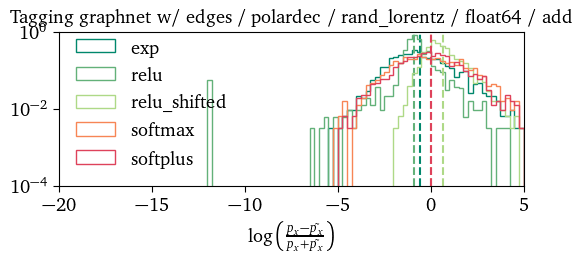

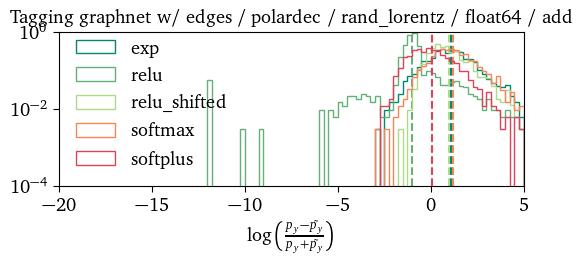

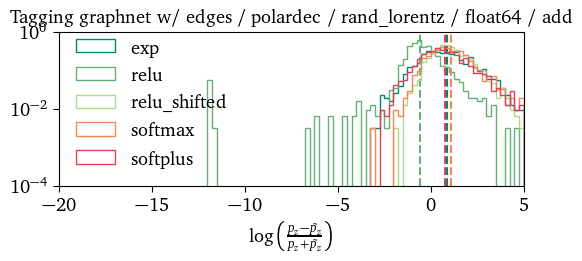

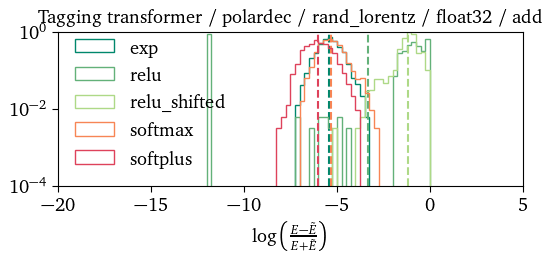

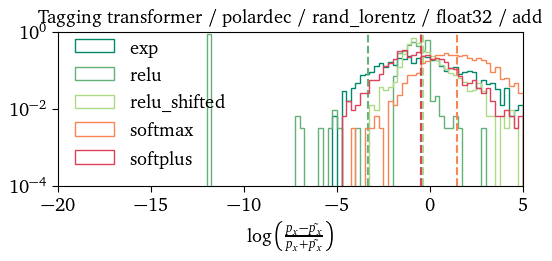

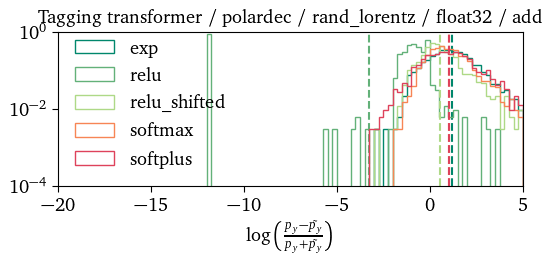

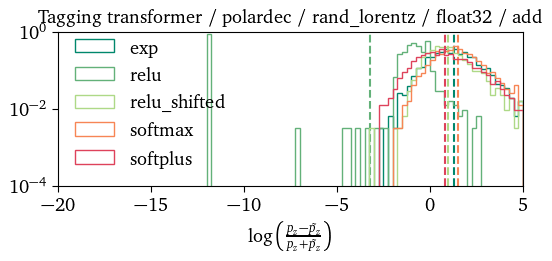

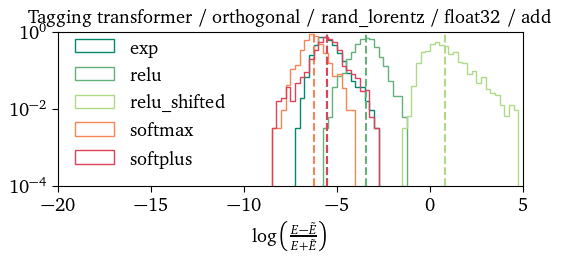

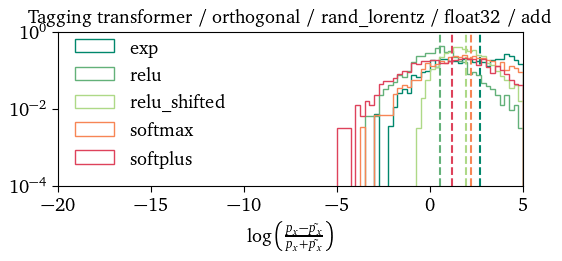

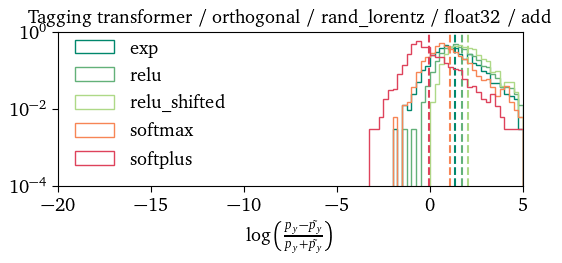

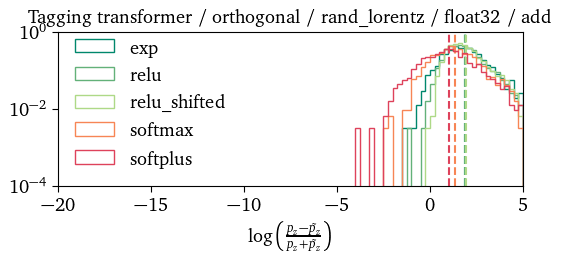

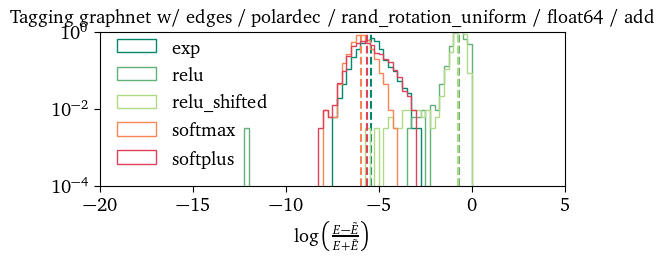

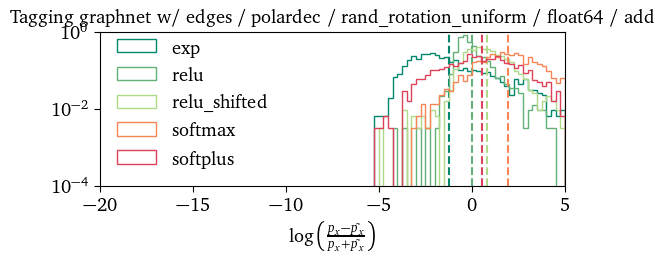

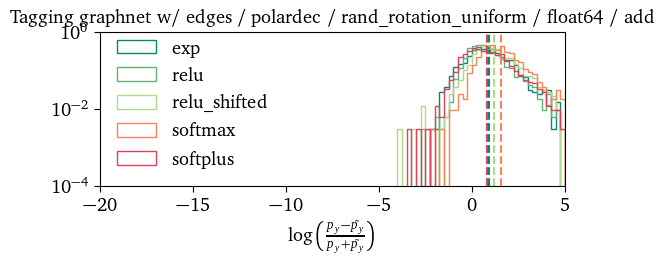

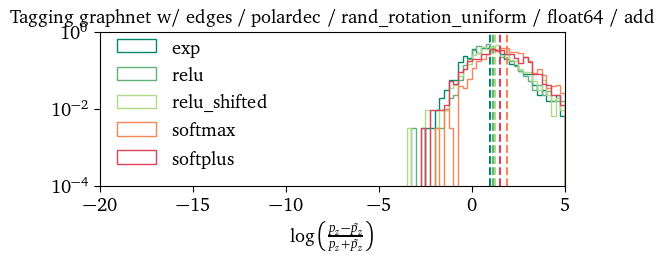

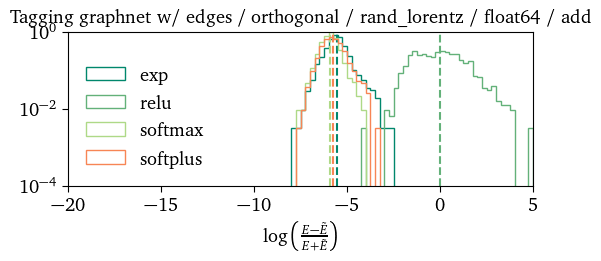

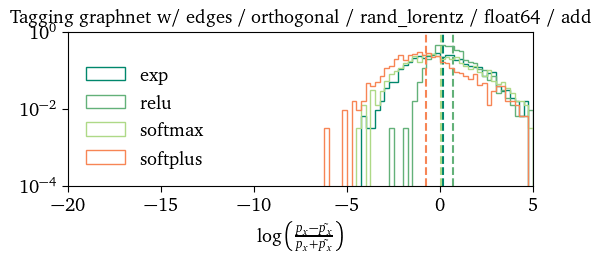

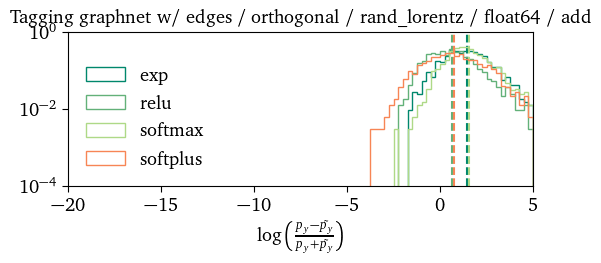

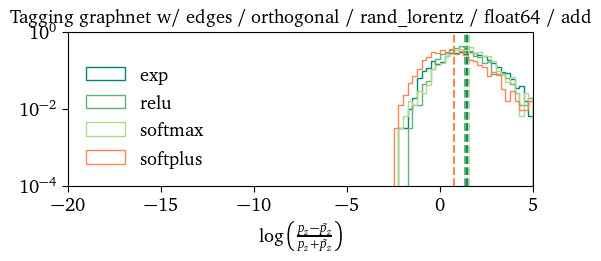

In [5]:
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
from collections import defaultdict

dir_path = "tests3/"

# Plot settings
xrange = [-20, 5]
yrange = [1e-4, 1e0]
colors = ["#00876c", "#63b179", "#aed987", "#f78555", "#de425b"]
linestyles = ["-", "--"]
component_names = ["E", "p_x", "p_y", "p_z"]

models = ["transformer", "graphnet w/ edges"]

grouped_data = defaultdict(dict)
for fname in os.listdir(dir_path):
    if not fname.endswith(".npy"):
        continue

    path = os.path.join(dir_path, fname)
    data = np.load(path)

    base = os.path.splitext(fname)[0]
    parts = base.split(">")[1:]  # skip prefix like 'tag_xxx'

    # Robust parser: handles multiple ~ per >
    different_plots = []
    different_lines = []
    for part in parts:
        tokens = part.split("~")
        different_plots.append(tokens[0])
        different_lines.extend(tokens[1:])

    key = tuple(different_plots)
    for nonlinearity in different_lines:
        grouped_data[key][nonlinearity] = data

with PdfPages(f"{dir_path}tag_equi-violation_invariants.pdf") as file:
    for plot_key, line_dict in grouped_data.items():
        model_idx = int(plot_key[0])

        for component in range(4):
            fig, ax = plt.subplots(figsize=(6, 2))
            ax.set_yscale("log")

            for i, (nonlinearity, data) in enumerate(sorted(line_dict.items())):
                values = data[:, component]
                log_data = np.log10(values)
                kwargs = {
                    "bins": 100,
                    "range": xrange,
                    "density": True,
                    "histtype": "step",
                    "color": colors[i % len(colors)],
                    "label": nonlinearity,
                }
                ax.hist(log_data, **kwargs)
                mean = log_data.mean()
                ax.vlines(mean, *yrange, color=colors[i % len(colors)], linestyle="--")

            ax.set_ylim(yrange)
            ax.set_xlim(xrange)
            ax.legend(loc=3, frameon=False)
            ax.set_xlabel(
                rf"$\log\left(\frac{{{component_names[component]} - \tilde{{{component_names[component]}}}}}{{{component_names[component]} + \tilde{{{component_names[component]}}}}}\right)$"
            )
            ax.set_title(f"Tagging {models[model_idx]} / " + " / ".join(plot_key[1:]))
            plt.savefig(file, format="pdf", bbox_inches="tight")
            plt.show()
